In [117]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=10)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"] = "SimHei" #解决中文乱码问题
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import model_selection

from sklearn.neighbors import KNeighborsRegressor

In [2]:
import json
# 读取json文件内容,返回字典格式
with open('./filesPath.json','r',encoding='utf8')as fp:
    json_data = json.load(fp)
print(json_data['df_train'])

E:\Visual_Studio_Code_Files\python\competitionData\Tmall\data_format1\train_format1.csv


In [3]:
df_train = pd.read_csv(json_data['df_train'])
df_test = pd.read_csv(json_data['df_test'])
user_info = pd.read_csv(json_data['user_info'])
user_log = pd.read_csv(json_data['user_log'])

In [4]:
df_train.head()

,user_id,merchant_id,label
0,34176,3906,0
1,34176,121,0
2,34176,4356,1
3,34176,2217,0
4,230784,4818,0


In [5]:
print(df_test.shape,df_train.shape)
print(user_info.shape,user_log.shape)

(261477, 3) (260864, 3)
(424170, 3) (54925330, 7)


In [6]:
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    424170 non-null  int64  
 1   age_range  421953 non-null  float64
 2   gender     417734 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 9.7 MB


In [7]:
user_info.head(10)

,user_id,age_range,gender
0,376517,6.0,1.0
1,234512,5.0,0.0
2,344532,5.0,0.0
3,186135,5.0,0.0
4,30230,5.0,0.0
5,272389,6.0,1.0
6,281071,4.0,0.0
7,139859,7.0,0.0
8,198411,5.0,1.0
9,67037,4.0,1.0


In [8]:
user_info.drop_duplicates(subset='age_range', keep='first', inplace=False)

,user_id,age_range,gender
0,376517,6.0,1.0
1,234512,5.0,0.0
6,281071,4.0,0.0
7,139859,7.0,0.0
17,349112,3.0,1.0
28,171799,0.0,1.0
263,328576,8.0,1.0
715,316419,2.0,0.0
10983,315780,NaN,NaN
52194,106650,1.0,0.0


In [9]:
user_info.drop_duplicates(subset='gender', keep='first', inplace=False)

,user_id,age_range,gender
0,376517,6.0,1.0
1,234512,5.0,0.0
10,149002,5.0,2.0
348,169941,4.0,NaN


In [10]:
user_info['age_range'].replace(0.0,np.nan,inplace=True)
user_info['gender'].replace(2.0,np.nan,inplace=True)
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    424170 non-null  int64  
 1   age_range  329039 non-null  float64
 2   gender     407308 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 9.7 MB


In [11]:
user_info['age_range'].replace(np.nan,-1,inplace=True)
user_info['gender'].replace(np.nan,-1,inplace=True)
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    424170 non-null  int64  
 1   age_range  424170 non-null  float64
 2   gender     424170 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 9.7 MB


Text(0.5, 1.0, '用户年龄分布')

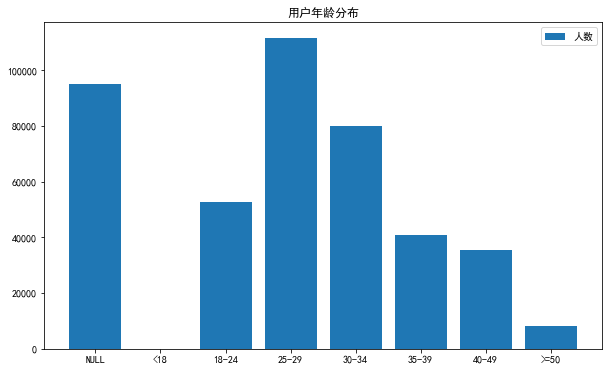

In [12]:
fig=plt.figure(figsize=(10,6))
x=np.array(['NULL','<18','18-24','25-29','30-34','35-39','40-49','>=50'])
y=np.array(
    [
        user_info[user_info['age_range']==-1]['age_range'].count(),
        user_info[user_info['age_range']==1]['age_range'].count(),
        user_info[user_info['age_range']==2]['age_range'].count(),
        user_info[user_info['age_range']==3]['age_range'].count(),
        user_info[user_info['age_range']==4]['age_range'].count(),
        user_info[user_info['age_range']==5]['age_range'].count(),
        user_info[user_info['age_range']==6]['age_range'].count(),
        user_info[user_info['age_range']==7]['age_range'].count()+user_info[user_info['age_range']==8]['age_range'].count()
    ]
    )   
plt.bar(x,y,label='人数')


plt.legend()
plt.title('用户年龄分布')

Text(0.5, 1.0, '用户年龄分布')

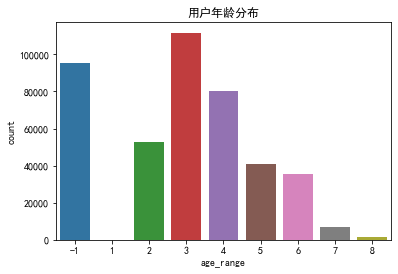

In [13]:
sns.countplot(x='age_range',order=[-1,1,2,3,4,5,6,7,8],data=user_info)
plt.title('用户年龄分布')

Text(0.5, 1.0, '用户性别分布')

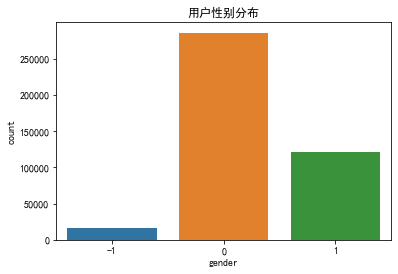

In [14]:
sns.countplot(x='gender',order=[-1,0,1],data=user_info)
plt.title('用户性别分布')

Text(0.5, 1.0, '用户年龄性别分布')

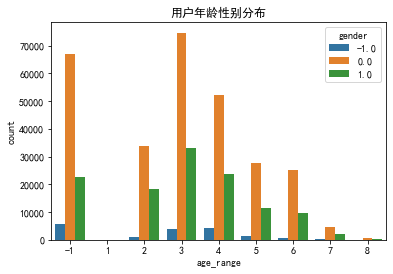

In [15]:
sns.countplot(x='age_range',order=[-1,1,2,3,4,5,6,7,8],hue='gender',data=user_info)
plt.title('用户年龄性别分布')

In [16]:
user_info['age_range'].replace(-1,np.nan,inplace=True)
user_info['gender'].replace(-1,np.nan,inplace=True)

In [17]:
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    424170 non-null  int64  
 1   age_range  329039 non-null  float64
 2   gender     407308 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 9.7 MB


In [18]:
# user_info=user_info.dropna()
# user_info.info()
# user_info.shape

In [19]:
user_log.head()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829,0
1,328862,844400,1271,2882,2661.0,829,0
2,328862,575153,1271,2882,2661.0,829,0
3,328862,996875,1271,2882,2661.0,829,0
4,328862,1086186,1271,1253,1049.0,829,0


In [20]:
user_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54925330 entries, 0 to 54925329
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      int64  
 1   item_id      int64  
 2   cat_id       int64  
 3   seller_id    int64  
 4   brand_id     float64
 5   time_stamp   int64  
 6   action_type  int64  
dtypes: float64(1), int64(6)
memory usage: 2.9 GB


In [21]:
user_log.isnull().sum(axis=0)

user_id            0
item_id            0
cat_id             0
seller_id          0
brand_id       91015
time_stamp         0
action_type        0
dtype: int64

In [22]:
df_train.head()

,user_id,merchant_id,label
0,34176,3906,0
1,34176,121,0
2,34176,4356,1
3,34176,2217,0
4,230784,4818,0


In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260864 entries, 0 to 260863
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   user_id      260864 non-null  int64
 1   merchant_id  260864 non-null  int64
 2   label        260864 non-null  int64
dtypes: int64(3)
memory usage: 6.0 MB


In [24]:
user_log.head()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829,0
1,328862,844400,1271,2882,2661.0,829,0
2,328862,575153,1271,2882,2661.0,829,0
3,328862,996875,1271,2882,2661.0,829,0
4,328862,1086186,1271,1253,1049.0,829,0


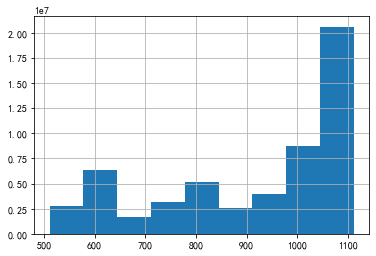

In [25]:
user_log['time_stamp'].hist(bins=9)

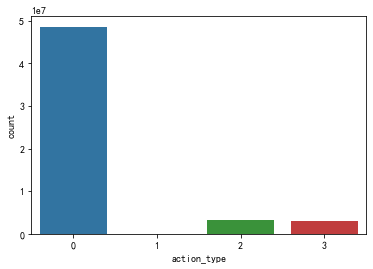

In [26]:
sns.countplot(x='action_type',order=[0,1,2,3],data=user_log)

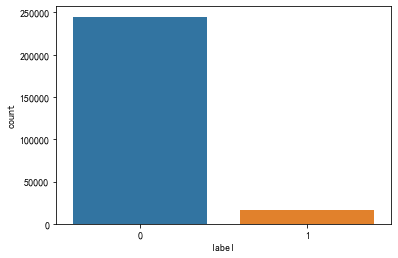

In [27]:
sns.countplot(x='label',order=[0,1],data=df_train)

In [28]:
df_train[df_train['label']==1].head()

,user_id,merchant_id,label
2,34176,4356,1
7,231552,3828,1
53,306816,1489,1
57,176256,3323,1
59,307584,1340,1


In [29]:
user_log.head()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829,0
1,328862,844400,1271,2882,2661.0,829,0
2,328862,575153,1271,2882,2661.0,829,0
3,328862,996875,1271,2882,2661.0,829,0
4,328862,1086186,1271,1253,1049.0,829,0


In [30]:
user_log[(user_log['user_id'] == 328862) & (user_log['seller_id'] == 2882)]

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829,0
1,328862,844400,1271,2882,2661.0,829,0
2,328862,575153,1271,2882,2661.0,829,0
3,328862,996875,1271,2882,2661.0,829,0
5,328862,623866,1271,2882,2661.0,829,0
6,328862,542871,1467,2882,2661.0,829,0
8,328862,364513,1271,2882,2661.0,829,0
9,328862,575153,1271,2882,2661.0,829,0
66,328862,440930,1271,2882,2661.0,829,0
67,328862,575153,1271,2882,2661.0,829,3


In [31]:
#构造特征


In [32]:
df_train.head()

,user_id,merchant_id,label
0,34176,3906,0
1,34176,121,0
2,34176,4356,1
3,34176,2217,0
4,230784,4818,0


In [33]:
user_info.head()

,user_id,age_range,gender
0,376517,6.0,1.0
1,234512,5.0,0.0
2,344532,5.0,0.0
3,186135,5.0,0.0
4,30230,5.0,0.0


In [34]:
user_log.head()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829,0
1,328862,844400,1271,2882,2661.0,829,0
2,328862,575153,1271,2882,2661.0,829,0
3,328862,996875,1271,2882,2661.0,829,0
4,328862,1086186,1271,1253,1049.0,829,0


In [35]:
#age_range,gender 特征添加
df_train=pd.merge(left=df_train,right=user_info,on='user_id',how='left')
df_train.head()

,user_id,merchant_id,label,age_range,gender
0,34176,3906,0,6.0,0.0
1,34176,121,0,6.0,0.0
2,34176,4356,1,6.0,0.0
3,34176,2217,0,6.0,0.0
4,230784,4818,0,NaN,0.0


In [36]:
total_logs_temp=user_log.groupby([user_log['user_id'],user_log['seller_id']]).count().reset_index()[["user_id","seller_id","item_id"]]

In [37]:
total_logs_temp.head(10)

,user_id,seller_id,item_id
0,1,471,1
1,1,739,1
2,1,925,4
3,1,1019,14
4,1,1156,1
5,1,2245,5
6,1,4026,5
7,1,4177,1
8,1,4335,1
9,2,420,26


In [38]:
total_logs_temp.rename(columns={"seller_id":"merchant_id","item_id":"total_logs"},inplace=True)
total_logs_temp.head()

,user_id,merchant_id,total_logs
0,1,471,1
1,1,739,1
2,1,925,4
3,1,1019,14
4,1,1156,1


In [39]:
df_train=pd.merge(left=df_train,right=total_logs_temp,on=["user_id","merchant_id"],how='left')
df_train.head()

,user_id,merchant_id,label,age_range,gender,total_logs
0,34176,3906,0,6.0,0.0,39
1,34176,121,0,6.0,0.0,14
2,34176,4356,1,6.0,0.0,18
3,34176,2217,0,6.0,0.0,2
4,230784,4818,0,NaN,0.0,8


In [40]:
unique_item_ids_temp=user_log.groupby([user_log['user_id'],user_log['seller_id'],user_log['item_id']]).count().reset_index()[['user_id','seller_id','item_id']]
unique_item_ids_temp.head(10)

,user_id,seller_id,item_id
0,1,471,638653
1,1,739,556107
2,1,925,504149
3,1,1019,1110495
4,1,1156,896183
5,1,2245,181459
6,1,2245,452837
7,1,2245,543397
8,1,2245,779078
9,1,4026,112203


In [41]:
unique_item_ids_temp1=unique_item_ids_temp.groupby([unique_item_ids_temp['user_id'],unique_item_ids_temp['seller_id']]).count().reset_index()

In [42]:
unique_item_ids_temp1.head()

,user_id,seller_id,item_id
0,1,471,1
1,1,739,1
2,1,925,1
3,1,1019,1
4,1,1156,1


In [43]:
unique_item_ids_temp1.rename(columns={"seller_id":"merchant_id","item_id":"unique_item_ids"},inplace=True)
unique_item_ids_temp1.head()

,user_id,merchant_id,unique_item_ids
0,1,471,1
1,1,739,1
2,1,925,1
3,1,1019,1
4,1,1156,1


In [44]:
df_train=pd.merge(df_train,unique_item_ids_temp1,on=['user_id','merchant_id'],how='left')
df_train.head()

,user_id,merchant_id,label,age_range,gender,total_logs,unique_item_ids
0,34176,3906,0,6.0,0.0,39,20
1,34176,121,0,6.0,0.0,14,1
2,34176,4356,1,6.0,0.0,18,2
3,34176,2217,0,6.0,0.0,2,1
4,230784,4818,0,NaN,0.0,8,1


In [45]:
categories_temp=user_log.groupby([user_log['user_id'],user_log['seller_id'],user_log['cat_id']]).count().reset_index()[['user_id','seller_id','cat_id']]
categories_temp.head()

,user_id,seller_id,cat_id
0,1,471,389
1,1,739,1252
2,1,925,1023
3,1,1019,992
4,1,1156,1256


In [46]:
categories_temp1=categories_temp.groupby([categories_temp['user_id'],categories_temp['seller_id']]).count().reset_index()
categories_temp1.head()

,user_id,seller_id,cat_id
0,1,471,1
1,1,739,1
2,1,925,1
3,1,1019,1
4,1,1156,1


In [47]:
categories_temp1.rename(columns={"seller_id":"merchant_id","cat_id":"categories"},inplace=True)
categories_temp1.head()

,user_id,merchant_id,categories
0,1,471,1
1,1,739,1
2,1,925,1
3,1,1019,1
4,1,1156,1


In [48]:
df_train=pd.merge(left=df_train,right=categories_temp1,on=['user_id','merchant_id'],how='left')
df_train.head()

,user_id,merchant_id,label,age_range,gender,total_logs,unique_item_ids,categories
0,34176,3906,0,6.0,0.0,39,20,6
1,34176,121,0,6.0,0.0,14,1,1
2,34176,4356,1,6.0,0.0,18,2,1
3,34176,2217,0,6.0,0.0,2,1,1
4,230784,4818,0,NaN,0.0,8,1,1


In [49]:
browse_days_temp=user_log.groupby([user_log['user_id'],user_log['seller_id'],user_log['time_stamp']]).count().reset_index()[['user_id','seller_id','time_stamp']]
browse_days_temp.head()

,user_id,seller_id,time_stamp
0,1,471,1111
1,1,739,1018
2,1,925,1011
3,1,1019,1111
4,1,1156,1111


In [50]:
browse_days_temp1 = browse_days_temp.groupby([browse_days_temp["user_id"],browse_days_temp["seller_id"]]).count().reset_index()
browse_days_temp1.head(10)

,user_id,seller_id,time_stamp
0,1,471,1
1,1,739,1
2,1,925,1
3,1,1019,1
4,1,1156,1
5,1,2245,1
6,1,4026,2
7,1,4177,1
8,1,4335,1
9,2,420,1


In [51]:
browse_days_temp1.rename(columns={"seller_id":"merchant_id","time_stamp":"browse_days"},inplace=True)
browse_days_temp1.head(10)

,user_id,merchant_id,browse_days
0,1,471,1
1,1,739,1
2,1,925,1
3,1,1019,1
4,1,1156,1
5,1,2245,1
6,1,4026,2
7,1,4177,1
8,1,4335,1
9,2,420,1


In [52]:
df_train = pd.merge(df_train,browse_days_temp1,on=["user_id","merchant_id"],how="left")
df_train.head()

,user_id,merchant_id,label,age_range,gender,total_logs,unique_item_ids,categories,browse_days
0,34176,3906,0,6.0,0.0,39,20,6,9
1,34176,121,0,6.0,0.0,14,1,1,3
2,34176,4356,1,6.0,0.0,18,2,1,2
3,34176,2217,0,6.0,0.0,2,1,1,1
4,230784,4818,0,NaN,0.0,8,1,1,3


In [53]:
one_clicks_temp = user_log.groupby([user_log["user_id"],user_log["seller_id"],user_log["action_type"]]).count().reset_index()[["user_id","seller_id","action_type","item_id"]]

In [54]:
one_clicks_temp.rename(columns={"seller_id":"merchant_id","item_id":"times"},inplace=True)

In [55]:
one_clicks_temp["one_clicks"] =one_clicks_temp['action_type']==0

In [56]:
one_clicks_temp["one_clicks"] = one_clicks_temp["one_clicks"] * one_clicks_temp["times"]

In [57]:
one_clicks_temp

,user_id,merchant_id,action_type,times,one_clicks
0,1,471,0,1,1
1,1,739,0,1,1
2,1,925,0,3,3
3,1,925,2,1,0
4,1,1019,0,10,10
...,...,...,...,...,...
17506920,424170,3469,0,1,1
17506921,424170,3736,0,10,10
17506922,424170,4268,0,24,24
17506923,424170,4268,2,1,0


In [58]:
one_clicks_temp["shopping_carts"] = one_clicks_temp["action_type"] == 1

In [59]:
one_clicks_temp["shopping_carts"] = one_clicks_temp["shopping_carts"] * one_clicks_temp["times"]

In [60]:
one_clicks_temp["purchase_times"] = one_clicks_temp["action_type"] == 2

In [61]:
one_clicks_temp["purchase_times"] = one_clicks_temp["purchase_times"] * one_clicks_temp["times"]

In [62]:
one_clicks_temp["favourite_times"] = one_clicks_temp["action_type"] == 3

In [63]:
one_clicks_temp["favourite_times"] = one_clicks_temp["favourite_times"] * one_clicks_temp["times"]

In [64]:
one_clicks_temp.head()

,user_id,merchant_id,action_type,times,one_clicks,shopping_carts,purchase_times,favourite_times
0,1,471,0,1,1,0,0,0
1,1,739,0,1,1,0,0,0
2,1,925,0,3,3,0,0,0
3,1,925,2,1,0,0,1,0
4,1,1019,0,10,10,0,0,0


In [65]:
one_clicks_temp.head()

,user_id,merchant_id,action_type,times,one_clicks,shopping_carts,purchase_times,favourite_times
0,1,471,0,1,1,0,0,0
1,1,739,0,1,1,0,0,0
2,1,925,0,3,3,0,0,0
3,1,925,2,1,0,0,1,0
4,1,1019,0,10,10,0,0,0


In [67]:
four_features = one_clicks_temp.groupby([one_clicks_temp["user_id"],one_clicks_temp["merchant_id"]]).sum().reset_index()

In [68]:
four_features.head(10)

,user_id,merchant_id,action_type,times,one_clicks,shopping_carts,purchase_times,favourite_times
0,1,471,0,1,1,0,0,0
1,1,739,0,1,1,0,0,0
2,1,925,2,4,3,0,1,0
3,1,1019,2,14,10,0,4,0
4,1,1156,0,1,1,0,0,0
5,1,2245,0,5,5,0,0,0
6,1,4026,2,5,4,0,1,0
7,1,4177,0,1,1,0,0,0
8,1,4335,0,1,1,0,0,0
9,2,420,2,26,23,0,3,0


In [69]:
four_features.head(10)

,user_id,merchant_id,action_type,times,one_clicks,shopping_carts,purchase_times,favourite_times
0,1,471,0,1,1,0,0,0
1,1,739,0,1,1,0,0,0
2,1,925,2,4,3,0,1,0
3,1,1019,2,14,10,0,4,0
4,1,1156,0,1,1,0,0,0
5,1,2245,0,5,5,0,0,0
6,1,4026,2,5,4,0,1,0
7,1,4177,0,1,1,0,0,0
8,1,4335,0,1,1,0,0,0
9,2,420,2,26,23,0,3,0


In [70]:
four_features = four_features.drop(["action_type","times"], axis=1)

In [71]:
df_train = pd.merge(df_train,four_features,on=["user_id","merchant_id"],how="left")

In [72]:
df_train.head(10)

,user_id,merchant_id,label,age_range,gender,total_logs,unique_item_ids,categories,browse_days,one_clicks,shopping_carts,purchase_times,favourite_times
0,34176,3906,0,6.0,0.0,39,20,6,9,36,0,1,2
1,34176,121,0,6.0,0.0,14,1,1,3,13,0,1,0
2,34176,4356,1,6.0,0.0,18,2,1,2,12,0,6,0
3,34176,2217,0,6.0,0.0,2,1,1,1,1,0,1,0
4,230784,4818,0,NaN,0.0,8,1,1,3,7,0,1,0
5,362112,2618,0,4.0,1.0,1,1,1,1,0,0,1,0
6,34944,2051,0,5.0,0.0,3,2,1,1,2,0,1,0
7,231552,3828,1,5.0,0.0,83,48,15,3,78,0,5,0
8,231552,2124,0,5.0,0.0,7,4,1,1,6,0,1,0
9,232320,1168,0,4.0,1.0,4,1,1,2,2,0,1,1


In [73]:
df_train.shape

(260864, 13)

In [74]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260864 entries, 0 to 260863
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   user_id          260864 non-null  int64  
 1   merchant_id      260864 non-null  int64  
 2   label            260864 non-null  int64  
 3   age_range        203802 non-null  float64
 4   gender           250170 non-null  float64
 5   total_logs       260864 non-null  int64  
 6   unique_item_ids  260864 non-null  int64  
 7   categories       260864 non-null  int64  
 8   browse_days      260864 non-null  int64  
 9   one_clicks       260864 non-null  int64  
 10  shopping_carts   260864 non-null  int64  
 11  purchase_times   260864 non-null  int64  
 12  favourite_times  260864 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 27.9 MB


In [75]:
df_train.isnull().sum(axis=0)

user_id                0
merchant_id            0
label                  0
age_range          57062
gender             10694
total_logs             0
unique_item_ids        0
categories             0
browse_days            0
one_clicks             0
shopping_carts         0
purchase_times         0
favourite_times        0
dtype: int64

In [76]:
df_train = df_train.fillna(method='ffill')
# 缺失值向前填充

In [77]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260864 entries, 0 to 260863
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   user_id          260864 non-null  int64  
 1   merchant_id      260864 non-null  int64  
 2   label            260864 non-null  int64  
 3   age_range        260864 non-null  float64
 4   gender           260864 non-null  float64
 5   total_logs       260864 non-null  int64  
 6   unique_item_ids  260864 non-null  int64  
 7   categories       260864 non-null  int64  
 8   browse_days      260864 non-null  int64  
 9   one_clicks       260864 non-null  int64  
 10  shopping_carts   260864 non-null  int64  
 11  purchase_times   260864 non-null  int64  
 12  favourite_times  260864 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 27.9 MB


Text(0.5, 1.0, '训练集用户性别年龄分布')

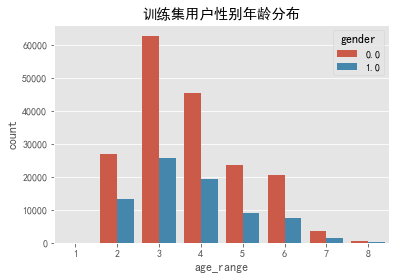

In [78]:
plt.style.use('ggplot')
sns.countplot(x = 'age_range', order = [1,2,3,4,5,6,7,8],hue= 'gender',data = df_train)
plt.title('训练集用户性别年龄分布')

['user_id', 'merchant_id', 'label', 'age_range', 'gender', 'total_logs', 'unique_item_ids', 'categories', 'browse_days', 'one_clicks', 'shopping_carts', 'purchase_times', 'favourite_times']


Text(0, 0.5, '用户数')

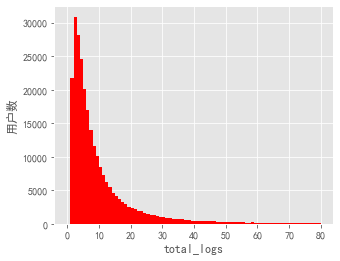

In [102]:
colnm=df_train.columns.to_list()
print(colnm)
plt.figure(figsize=(5,4))
# color=sns.color_palette()
# print(color)
df_train[colnm[5]].hist(range=[0,80],bins=80,color='red')

plt.xlabel(colnm[5],fontsize=12)
plt.ylabel('用户数')

Text(0, 0.5, '用户数')

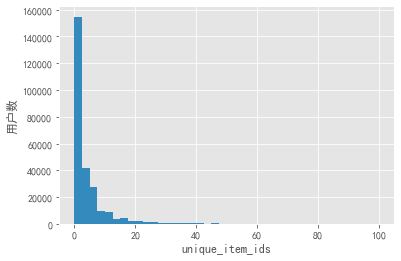

In [87]:
color=sns.color_palette()
df_train[colnm[6]].hist(range=[0,100],bins = 40,color = color[1])
plt.xlabel(colnm[6],fontsize = 12)
plt.ylabel('用户数')

In [88]:
df_train[colnm[5]].min()

1

Text(0, 0.5, '用户数')

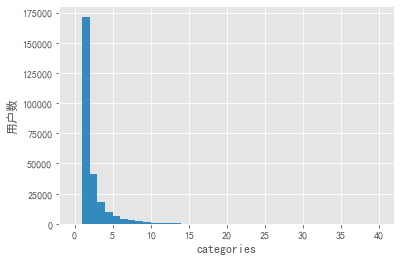

In [89]:
df_train[colnm[7]].hist(range=[0,40],bins = 40,color = color[1])
plt.xlabel(colnm[7],fontsize = 12)
plt.ylabel('用户数')

Text(0, 0.5, '用户数')

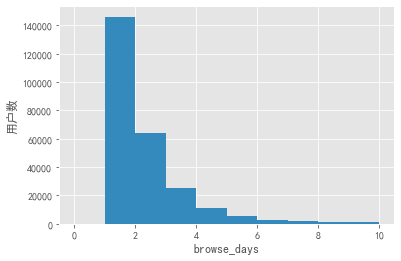

In [90]:
df_train[colnm[8]].hist(range=[0,10],bins = 10,color = color[1])
plt.xlabel(colnm[8],fontsize = 12)
plt.ylabel('用户数')

In [91]:
len(colnm)

13

Text(0, 0.5, '用户单击次数统计')

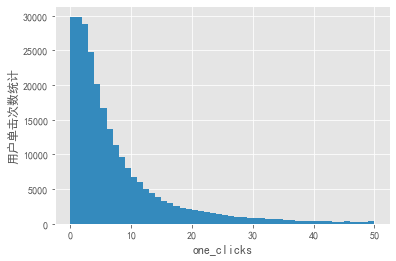

In [92]:
df_train[colnm[9]].hist(range=[0,50],bins = 50,color = color[1])
plt.xlabel(colnm[9],fontsize = 12)
plt.ylabel('用户单击次数统计')

Text(0, 0.5, '用户数')

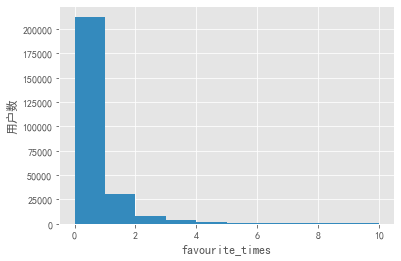

In [105]:
df_train[colnm[12]].hist(range=[0,10],bins = 10,color = color[1])
plt.xlabel(colnm[12],fontsize = 12)
plt.ylabel("用户数")

(11, 11)
[[ True  True  True  True  True  True  True  True  True  True  True]
 [False  True  True  True  True  True  True  True  True  True  True]
 [False False  True  True  True  True  True  True  True  True  True]
 [False False False  True  True  True  True  True  True  True  True]
 [False False False False  True  True  True  True  True  True  True]
 [False False False False False  True  True  True  True  True  True]
 [False False False False False False  True  True  True  True  True]
 [False False False False False False False  True  True  True  True]
 [False False False False False False False False  True  True  True]
 [False False False False False False False False False  True  True]
 [False False False False False False False False False False  True]]


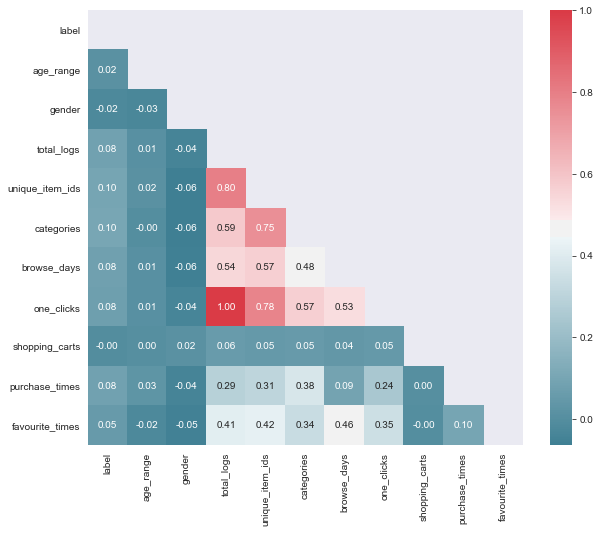

In [112]:
sns.set_style('dark')

plt.figure(figsize=(10,8))
colnm=df_train.columns.to_list()[2:13]
mcorr=df_train[colnm].corr()
print(mcorr.shape)
# np.zero_like的意思就是生成一个和你所给数组a相同shape的全0数组。
mask=np.zeros_like(mcorr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True 
print(mask)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True,fmt='0.2f')

# 模型构建与调参

In [115]:
# 逻辑回归模型

Y=df_train['label']
X=df_train.drop(columns=['user_id','merchant_id'],axis=1)
X.head()

,label,age_range,gender,total_logs,unique_item_ids,categories,browse_days,one_clicks,shopping_carts,purchase_times,favourite_times
0,0,6.0,0.0,39,20,6,9,36,0,1,2
1,0,6.0,0.0,14,1,1,3,13,0,1,0
2,1,6.0,0.0,18,2,1,2,12,0,6,0
3,0,6.0,0.0,2,1,1,1,1,0,1,0
4,0,6.0,0.0,8,1,1,3,7,0,1,0


In [116]:
Y.head(10)

0    0
1    0
2    1
3    0
4    0
5    0
6    0
7    1
8    0
9    0
Name: label, dtype: int64

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25,random_state = 10)

In [132]:
Logit=LogisticRegression(solver='sag')
Logit.fit(X_train,y_train)
predict=Logit.predict(X_test)
predicy_proba=Logit.predict_proba(X_test)
print(predict[0:20])
print(predicy_proba[0:20])
Score=accuracy_score(y_test,predict)
print(Score)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[0.99363027 0.00636973]
 [0.87785726 0.12214274]
 [0.91170186 0.08829814]
 [0.96464256 0.03535744]
 [0.91198919 0.08801081]
 [0.94634369 0.05365631]
 [0.9532994  0.0467006 ]
 [0.86912222 0.13087778]
 [0.9697241  0.0302759 ]
 [0.97108055 0.02891945]
 [0.92180868 0.07819132]
 [0.99043867 0.00956133]
 [0.73554754 0.26445246]
 [0.95525402 0.04474598]
 [0.93815435 0.06184565]
 [0.84900082 0.15099918]
 [0.87804876 0.12195124]
 [0.94462424 0.05537576]
 [0.95192075 0.04807925]
 [0.92980426 0.07019574]]
0.9385426889106968


In [133]:
print("lr.coef_:{}".format(Logit.coef_))
print("lr.intercept_:{}".format(Logit.intercept_))

lr.coef_:[[ 1.28863581 -0.5336256  -0.17132519 -0.03543866  0.03693591 -0.01177581
  -0.10847544  0.03365145 -0.01177374 -0.11377779  0.05646142]]
lr.intercept_:[-0.50118541]


In [134]:
#初始化逻辑回归算法
LogRegAlg=LogisticRegression(random_state=1,solver='liblinear')
re = LogRegAlg.fit(X,Y)

In [135]:
print("lr.coef_: {}".format(re.coef_))
print("lr.intercept_: {}".format(re.intercept_))
# 截距与斜率

lr.coef_: [[ 7.40760704e+00 -4.26627569e-01 -4.07439897e-01 -6.69411505e-02
   1.11432604e-02  5.21805390e-03 -1.49818154e-01  7.96907904e-02
  -4.14361194e-02 -1.20465136e-01  1.52693147e-02]]
lr.intercept_: [-2.76074003]


In [139]:
#初始化逻辑回归算法
LogRegAlg=LogisticRegression(random_state=1,solver='liblinear')
re = LogRegAlg.fit(X,Y)
#使用sklearn库里面的交叉验证函数获取预测准确率分数
scores=model_selection.cross_val_score(LogRegAlg,X,Y,cv=3)
print("准确率为：{}".format(scores.mean()))

准确率为：0.9989803094932422


In [140]:
#初始化逻辑回归算法
LogRegAlg=LogisticRegression(random_state=1,solver='liblinear')
re = LogRegAlg.fit(X,Y)
#使用sklearn库里面的交叉验证函数获取预测准确率分数
scores=model_selection.cross_val_score(re,X,Y,cv=3)
print("准确率为：{}".format(scores.mean()))

准确率为：0.9989803094932422
